## EE521: DSP Lab
## Assignment 2

- Submittted by
 - Sqn Ldr Monark Singh
 - 214102322

In [1]:
# Importing the dependencies
import numpy as np
from numpy import*
import matplotlib.pyplot as plt
from math import comb, factorial
import pandas as pd
from statistics import mean
import scipy.stats as stats


### Question 1:

In [2]:
# Defining a function to compute probability of Binomial distribution
def binomial(n,k,p):
    P = comb(n,k) * p**k * (1-p)**(n-k)
    
    return P


By using the Hamming code reliability changes from 65.61% to 85.03%


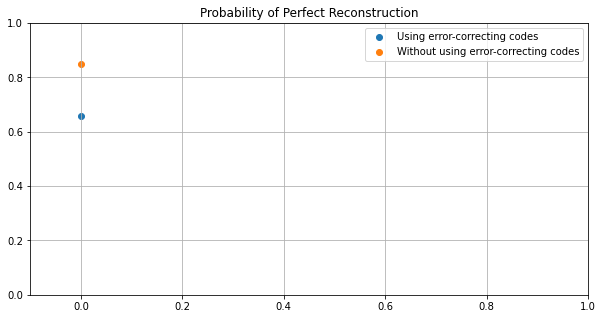

In [3]:
p = 0.1 # Probability of any bit being lost

# Case1: Without Using Hamming Code
# Probability of detecting the correct message
P1 = binomial(4,0,p)

# Case2: Using Hamming Code
# Probability of detecting the correct message
P2 = binomial(7,0,p) + binomial(7,1,p)

print(f'\nBy using the Hamming code reliability changes from {P1*100:.2f}% to {P2*100:.2f}%')

plt.figure(figsize=(10,5))
plt.scatter(0,P1,label='Using error-correcting codes')
plt.scatter(0,P2,label='Without using error-correcting codes')

plt.title('Probability of Perfect Reconstruction')
plt.xlim(-0.1,1)
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.show()

### Question 2:
A probability distribution for a random variable defined as the sum of a number of independent random variables, each having a uniform distribution is called Irwin-Hall Distribution.

In [4]:
# Defining the sign function:
def sgn(x,k):
    S=0
    if x<k:
        S = -1
    elif x==k:
        S = 0
    else:
        S = 1
        
    return S

# Defining the Irwin-Hall distribution function:
def pdf(n,x):
    P = 0 
    for k in range(n+1):
        s = sgn(x,k)
        P += ((-1)**k * comb(n,k) * (x-k)**(n-1) * s)
        
    return P*(1/(2*factorial(n-1)))

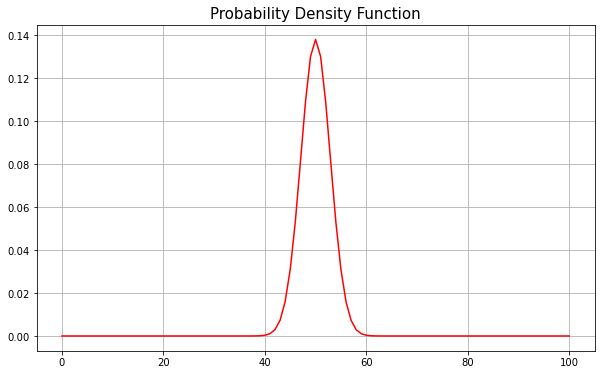

In [5]:
# Computing PDF for sum of 100 independent and uniformly distributed random variables over [0,1]
n = 100
N = np.arange(0,n+1,1)
fx = np.zeros(n+1)

for x in range(n+1):
    fx[x] = pdf(n,x)
    
plt.figure(figsize=(10,6))
plt.plot(N,fx, c='red')
plt.title('Probability Density Function',size='15')
    
plt.grid()
plt.show()

### Question 3:
- Autocorrelation sequence of a random process


Input Sequence:
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]

Autocorrelation Sequence:
 [1.    0.875 0.75  0.625 0.5   0.375 0.25  0.125 0.    0.    0.    0.
 0.    0.    0.   ]


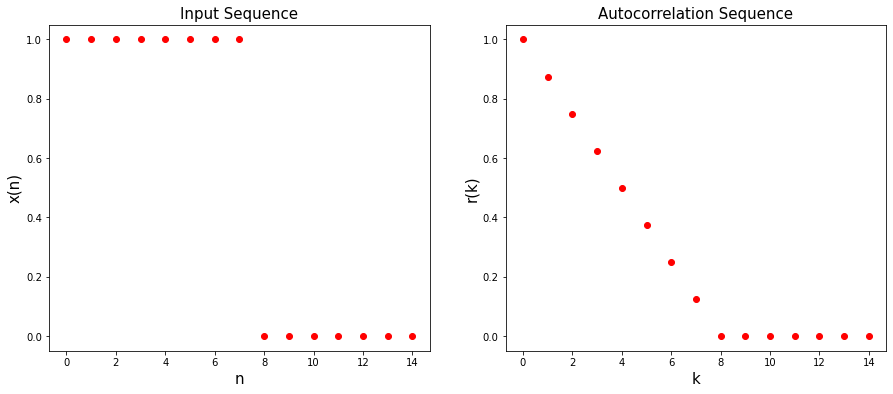

In [6]:
# Input Sequence
t1 = np.arange(0,15,1)
N1 = len(t1)
x = np.zeros(N1)

# Defining the input sequence
for n in range(N1):
    if t1[n]>=0 and t1[n]<=7:
        x[n] = 1
    else:
        x[n] = 0

# Autocorrelation Sequence
t = np.arange(0,8,1)

N = 7
#r = np.zeros(N+1)
r = np.zeros(N1)

# Computing autocorrelation sequence
for k in range(N+1):
    for n in range(N+1):
        r[k] += x[n]*x[n-k]
        
r = r/(N+1)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(t1,x, c='red')
plt.xlabel('n',size='15')
plt.ylabel('x(n)',size='15')
plt.title('Input Sequence',size='15')

plt.subplot(1,2,2)
plt.scatter(t1,r, c='red')
plt.xlabel('k',size='15')
plt.ylabel('r(k)',size='15')
plt.title('Autocorrelation Sequence',size='15')

print('\nInput Sequence:\n',x)
print('\nAutocorrelation Sequence:\n',r)


### Question 4:

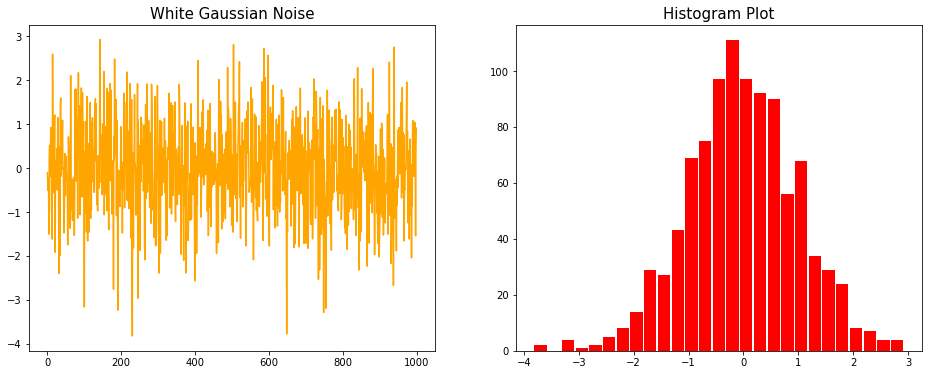

In [7]:
# Generating white gaussian noise
mean = 0
std = 1 
num_samples = 1000
samples = np.random.normal(mean, std, size=num_samples)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(samples,color='orange')
plt.title('White Gaussian Noise',size='15')

# Creating histogram
plt.subplot(1,2,2)
plt.hist(samples, bins='auto', color='red', rwidth=0.9)
plt.title('Histogram Plot',size='15')
plt.show()

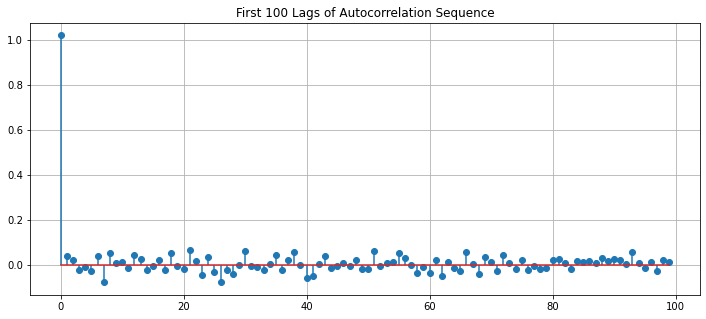

In [8]:
# Lags of autocorrelation sequence
x = samples
N = num_samples

M = 100  # Taking M=100
r = np.zeros(M)

# Computing first 100 lags of autocorrelation sequence
for k in range(M):
    for n in range(N):
        if n-k >=0:
            r[k] += x[n]*x[n-k]
            
r = r/N

t = np.arange(0,M,1)

plt.figure(figsize=(12,5))
#plt.scatter(t,r,color='red')
plt.stem(t,r)
plt.title('First 100 Lags of Autocorrelation Sequence')
plt.grid()

In [9]:
# Deviation between the estimate lags and the true Autocorrelation sequence
d = np.zeros(M)
e = np.zeros(M)

# Defining the True Autocorrelation sequence (Impulse sequence)
for i in range(M):
    if i == 0:
        d[i]=1
    else:
        d[i]=0

Err = 0
# Computing the RMS deviation 
for i in range(M):
    e[i] = (d[i]-r[i])**2
    Err += e[i]

E_rms = np.sqrt(Err/M)

print(f'\nRMS deviation between the estimate lags and the true Autocorrelation sequence= {E_rms:.2f}')


RMS deviation between the estimate lags and the true Autocorrelation sequence= 0.03


### Segment the white noise sequence into ten different white noise sequences each having a length of M samples, and estimate the autocorrelation by averaging the sample autocorrelations of each subsequence.

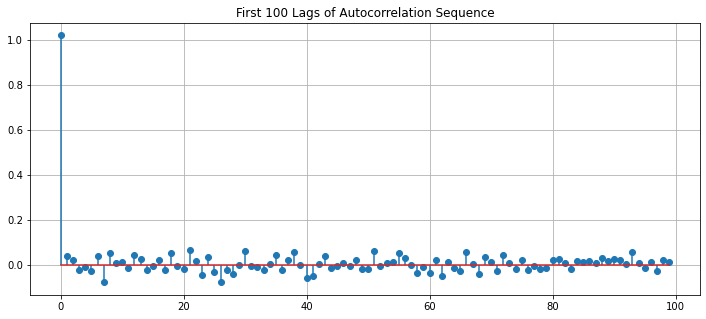

In [10]:
r_ = np.zeros(M)

for m in range(10):
    for k in range(M):
        for n in range(M):
            if (n-k+100*m) >=0:
                r_[k] += x[n+100*m]*x[n-k+100*m]
                
r_ = r_/N

t = np.arange(0,M,1)

plt.figure(figsize=(12,5))
#plt.scatter(t,r_,color='blue')
plt.stem(t,r_)
plt.title('First 100 Lags of Autocorrelation Sequence')
plt.grid()

In [11]:
e1 = np.zeros(M)
e2 = np.zeros(M)
Err1 = 0
Err2 = 0

# Computing the RMS deviation 
for i in range(M):
    e1[i] = (r[i]-r_[i])**2
    e2[i] = (d[i]-r_[i])**2
    
    Err1 += e1[i]
    Err2 += e2[i]
    
E_rms1 = np.sqrt(Err1/M)
E_rms2 = np.sqrt(Err2/M)

print(f'\nRMS deviation between the estimate lags and that computed in part(b)= {E_rms1:.4f}')
print(f'\nRMS deviation between the estimate lags and the true Autocorrelation sequence= {E_rms2:.4f}')


RMS deviation between the estimate lags and that computed in part(b)= 0.0000

RMS deviation between the estimate lags and the true Autocorrelation sequence= 0.0307


### Q.4(d) Generating 10000 samples of zero mean unit variance white gaussian noise sequnece

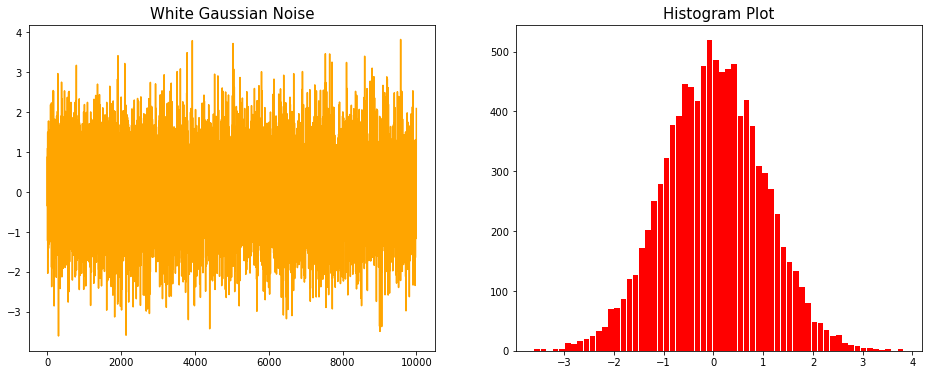

In [12]:
mean = 0
std = 1 
num_samples = 10000
samples = np.random.normal(mean, std, size=num_samples)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(samples,color='orange')
plt.title('White Gaussian Noise',size='15')

# Creating histogram
plt.subplot(1,2,2)
plt.hist(samples, bins='auto', color='red', rwidth=0.9)
plt.title('Histogram Plot',size='15')
plt.show()

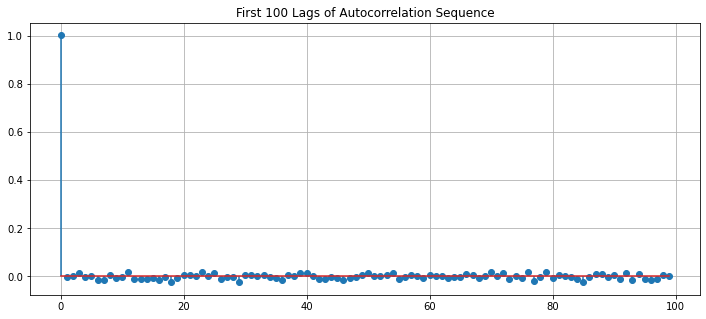

In [13]:
# Estimating the first 100 lags
x = samples
N = num_samples

M = 100  # Taking M=100
r1 = np.zeros(M)

# Computing first 100 lags of autocorrelation sequence
for k in range(M):
    for n in range(N):
        if n-k >=0:
            r1[k] += x[n]*x[n-k]
            
r1 = r1/N

t = np.arange(0,M,1)

plt.figure(figsize=(12,5))
#plt.scatter(t,r1,color='blue')
plt.stem(t,r1)
plt.title('First 100 Lags of Autocorrelation Sequence')
plt.grid()

In [14]:
# Comparing the estimates
e = np.zeros(M)
Err = 0
# Computing the RMS deviation
for i in range(M):
    e[i] = (r[i]-r1[i])**2
    Err += e[i]

E_rms = np.sqrt(Err/M)

print(f'\nRMS deviation between the estimate lags and that computed in part(b)= {E_rms:.4f}')


RMS deviation between the estimate lags and that computed in part(b)= 0.0332


### Question 5:

In [15]:
# Reading the given txt file and creating dataframe
dataframe = pd.read_csv("seeds_dataset.txt",delimiter = '\t')
  
# Store dataframe into csv file
dataframe.to_csv('seeds_dataset.csv',index = None)

df = pd.read_csv("seeds_dataset.csv")

# Adding Column Name to the dataset
df.columns = ['Feature1','Feature2','Feature3','Feature4','Feature5','Feature6','Feature7','Type']

print(df.head())    # Displaying the First 5 rows of Seeds Dataset

   Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  Type
0     14.88     14.57    0.8811     5.554     3.333     1.018     4.956     1
1     14.29     14.09    0.9050     5.291     3.337     2.699     4.825     1
2     13.84     13.94    0.8955     5.324     3.379     2.259     4.805     1
3     16.14     14.99    0.9034     5.658     3.562     1.355     5.175     1
4     14.38     14.21    0.8951     5.386     3.312     2.462     4.956     1


In [16]:
# Extracting the feature values
X1 = df.iloc[:,0]
X2 = df.iloc[:,1]
X3 = df.iloc[:,2]
X4 = df.iloc[:,3]
X5 = df.iloc[:,4]
X6 = df.iloc[:,5]
X7 = df.iloc[:,6]

### Defining custom functions for computing Correlation and Covariance

In [17]:
# Defining Correlation function:
def Corr(x,y):
    num = 0
    den1= 0
    den2= 0
    N = len(X1)
        
    for i in range(N):
        num += (x[i]-np.mean(x))*(y[i]-np.mean(y))
        
    for i in range(N):
        den1 += (x[i]-np.mean(x))**2
        den2 += (y[i]-np.mean(y))**2
        
    r = num / (np.sqrt(den1)*np.sqrt(den2))
    return r

# Defining Covariance function:
def Cov(x,y):
    c = 0
    N = len(X1)
    for i in range(N):
        c += (x[i]- np.mean(x))*(y[i]- np.mean(y))
        
    return c/(N-1)

In [18]:
X = [X1,X2,X3,X4,X5,X6,X7]
rows = cols = 7

Rxy = [[0 for i in range(cols)] for j in range(rows)]
Cxy = [[0 for i in range(cols)] for j in range(rows)]

for i in range(rows):
    for j in range(cols):
        Rxy[i][j] = Corr(X[i],X[j])
        Cxy[i][j] = Cov(X[i],X[j])
        

In [19]:
Rxy = np.around(Rxy,2)
Cxy = np.around(Cxy,2)

feature_list=['Feature1','Feature2','Feature3','Feature4','Feature5','Feature6','Feature7']

print("\n\t\t\t\033[1m  Correlation Table  \033[0m")
pd.DataFrame(Rxy, feature_list, feature_list)


			  Correlation Table  


,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7
Feature1,1.00,0.99,0.61,0.95,0.97,-0.23,0.86
Feature2,0.99,1.00,0.53,0.97,0.94,-0.22,0.89
Feature3,0.61,0.53,1.00,0.37,0.76,-0.33,0.23
Feature4,0.95,0.97,0.37,1.00,0.86,-0.17,0.93
Feature5,0.97,0.94,0.76,0.86,1.00,-0.26,0.75
Feature6,-0.23,-0.22,-0.33,-0.17,-0.26,1.00,-0.01
Feature7,0.86,0.89,0.23,0.93,0.75,-0.01,1.00


In [20]:
print("\n\t\t\t\033[1m  Covariance Table  \033[0m")
pd.DataFrame(Cxy, feature_list, feature_list)


			  Covariance Table  


,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7
Feature1,8.51,3.80,0.04,1.23,1.07,-1.01,1.24
Feature2,3.80,1.71,0.02,0.57,0.47,-0.43,0.57
Feature3,0.04,0.02,0.00,0.00,0.01,-0.01,0.00
Feature4,1.23,0.57,0.00,0.20,0.14,-0.11,0.20
Feature5,1.07,0.47,0.01,0.14,0.14,-0.15,0.14
Feature6,-1.01,-0.43,-0.01,-0.11,-0.15,2.26,-0.01
Feature7,1.24,0.57,0.00,0.20,0.14,-0.01,0.24


### Computing Correlation and Covariance using Inbuilt functions

In [21]:
df = df.iloc[:,:7]

print("\n\t\t\t\033[1m  Correlation Table  \033[0m")
np.around(df.corr(method ='pearson'),2)


			  Correlation Table  


,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7
Feature1,1.00,0.99,0.61,0.95,0.97,-0.23,0.86
Feature2,0.99,1.00,0.53,0.97,0.94,-0.22,0.89
Feature3,0.61,0.53,1.00,0.37,0.76,-0.33,0.23
Feature4,0.95,0.97,0.37,1.00,0.86,-0.17,0.93
Feature5,0.97,0.94,0.76,0.86,1.00,-0.26,0.75
Feature6,-0.23,-0.22,-0.33,-0.17,-0.26,1.00,-0.01
Feature7,0.86,0.89,0.23,0.93,0.75,-0.01,1.00


In [22]:
print("\n\t\t\t\033[1m  Covariance Table  \033[0m")
np.around(df.cov(),2)


			  Covariance Table  


,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7
Feature1,8.51,3.80,0.04,1.23,1.07,-1.01,1.24
Feature2,3.80,1.71,0.02,0.57,0.47,-0.43,0.57
Feature3,0.04,0.02,0.00,0.00,0.01,-0.01,0.00
Feature4,1.23,0.57,0.00,0.20,0.14,-0.11,0.20
Feature5,1.07,0.47,0.01,0.14,0.14,-0.15,0.14
Feature6,-1.01,-0.43,-0.01,-0.11,-0.15,2.26,-0.01
Feature7,1.24,0.57,0.00,0.20,0.14,-0.01,0.24


### Question 6:
- X(t) = 5 sin (2t + φ1) + 6 cos (3t + φ2)

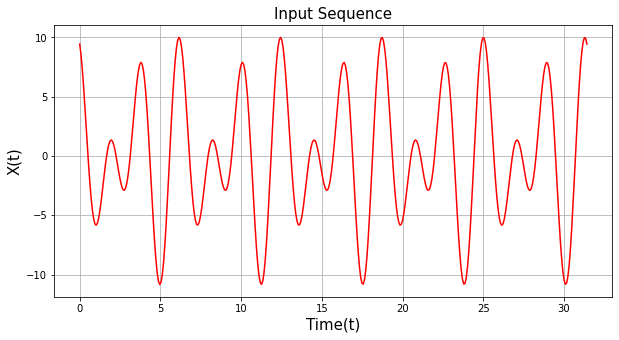

In [23]:
# Input Sequence X(t)
t = linspace(0, 10*pi, 400)

phi1 = random.uniform(-pi,pi,1)
phi2 = random.uniform(0,2*pi,1)
        
X = 5*sin(2*t+phi1) + 6*cos(3*t+phi2)
        
plt.figure(figsize=(10,5))
plt.plot(t,X, c='red')
plt.xlabel('Time(t)',size=15)
plt.ylabel('X(t)',size=15)
plt.title('Input Sequence',size=15)
plt.grid()

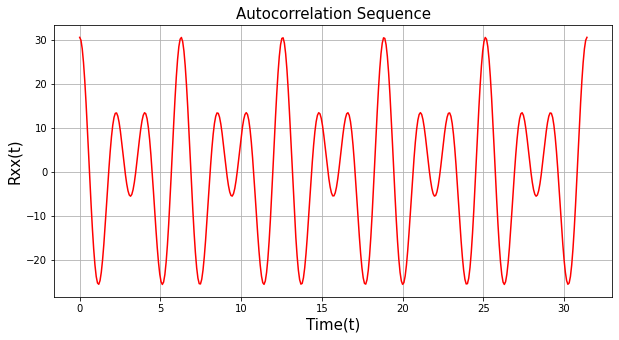

In [24]:
# Autocorrelation Sequence Rxx(t)

Rxx = 12.5*cos(2*t) + 18*cos(3*t)

plt.figure(figsize=(10,5))
plt.plot(t,Rxx, c='red')
plt.xlabel('Time(t)',size=15)
plt.ylabel('Rxx(t)',size=15)
plt.title('Autocorrelation Sequence',size=15)
plt.grid()

### Question 7:
    
### Chi-squared distribution

In [25]:
sample = random.chisquare(df=2,size=(2,3))

print('Sample for chi-squared distribution with degree of freedom 2 with size 2×3:\n\n',sample)


Sample for chi-squared distribution with degree of freedom 2 with size 2×3:

 [[3.66608279 0.38062372 3.90818171]
 [0.7821481  0.85138104 0.48647982]]


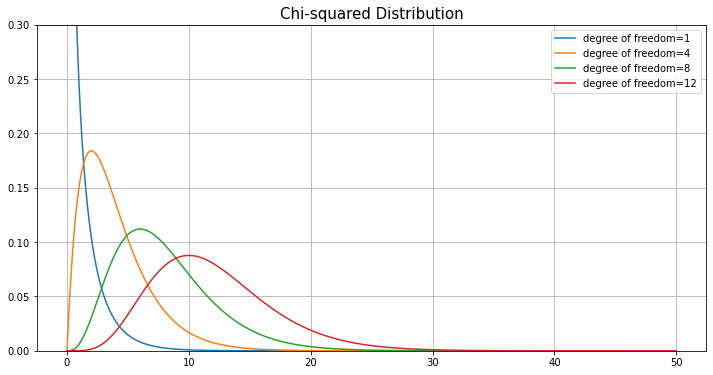

In [26]:
x = np.arange(0,50,0.05)

plt.figure(figsize=(12,6))
plt.plot(x, stats.chi2.pdf(x, df=1),label='degree of freedom=1')
plt.plot(x, stats.chi2.pdf(x, df=4),label='degree of freedom=4')
plt.plot(x, stats.chi2.pdf(x, df=8),label='degree of freedom=8')
plt.plot(x, stats.chi2.pdf(x, df=12),label='degree of freedom=12')

plt.title('Chi-squared Distribution',size=15)
plt.ylim(0,0.3)
plt.legend()
plt.grid()
plt.show()

### Question 8:

### Exponential Distribution

In [27]:
sample = random.exponential(scale=2 ,size=(2,3))

print('Sample for Exponential distribution with scale= 2 and size 2×3:\n\n',sample)


Sample for Exponential distribution with scale= 2 and size 2×3:

 [[1.37101526 6.33680625 2.56337237]
 [3.56859367 4.02435265 0.70925584]]


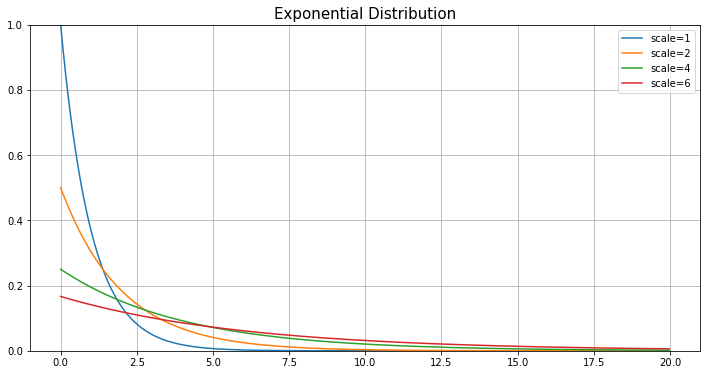

In [28]:
x = np.arange(0,20,0.02)

plt.figure(figsize=(12,6))
plt.plot(x, stats.expon.pdf(x, scale=1),label='scale=1')
plt.plot(x, stats.expon.pdf(x, scale=2),label='scale=2')
plt.plot(x, stats.expon.pdf(x, scale=4),label='scale=4')
plt.plot(x, stats.expon.pdf(x, scale=6),label='scale=6')

plt.title('Exponential Distribution',size=15)
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.show()

### Question 9:

### (a) Generate a 1-D array containing 100 values, where each value has to be 2,4,6 or 8. The probability for the value to be 2,4,6 and 8 is set to be 0.1, 0.3, 0.6, 0, respectively.

In [29]:
values = [2, 4, 6, 8]         # Values of 1D array
weights = [0.1, 0.3, 0.6, 0]  # Probability of each value
N = 100                       # Number of values

random_1darray = random.choice(values, N, weights)

print(' 1D Array:\n\n',random_1darray)

 1D Array:

 [4 8 4 4 4 8 4 4 6 6 8 4 2 2 8 8 8 2 4 2 6 4 6 2 4 8 4 6 8 8 6 8 6 4 2 8 8
 8 8 2 2 8 2 4 6 4 2 6 4 2 6 2 6 6 6 6 6 6 6 2 6 2 2 4 2 2 8 2 4 4 6 8 6 2
 6 8 2 6 8 8 8 2 2 2 2 2 8 8 8 8 6 8 6 6 4 4 8 4 8 4]


### (b) For the same example as (a), return a 2-D array with 3 rows, each containing 5 values.

In [30]:
size = (3,5)    # Size of the 2D array

random_2darray = random.choice(values,size, weights)

print(' 2D Array:\n\n',random_2darray)

 2D Array:

 [[4 4 6 2 6]
 [6 2 8 6 8]
 [8 8 2 2 8]]


### Question 10:

### Central Chi-squared Distribution

In [31]:
# Defining PDF of chi-squared distributed random variable
def chi_square(k):
    x = np.arange(0.05,10,0.05)
    n = len(x)
    f = np.zeros(n)
    
    for i in range(n):
        f[i] = 1/(2**(k/2) * math.gamma(k/2)) * x[i]**(k/2-1) * math.exp(-x[i]/2)

    return f


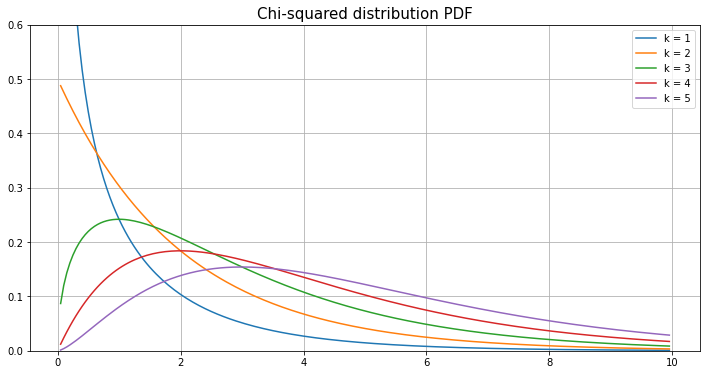

In [32]:
# Calling the function for different values of 'degree of freedom'
x = np.arange(0.05,10,0.05)
fx1 = chi_square(1)
fx2 = chi_square(2)
fx3 = chi_square(3)
fx4 = chi_square(4)
fx5 = chi_square(5)

# Visualizing the plot
plt.figure(figsize=(12,6))

plt.plot(x,fx1,label='k = 1')
plt.plot(x,fx2,label='k = 2')
plt.plot(x,fx3,label='k = 3')
plt.plot(x,fx4,label='k = 4')
plt.plot(x,fx5,label='k = 5')

plt.title('Chi-squared distribution PDF',size='15')
plt.ylim(0,0.6)
plt.grid()
plt.legend()
plt.show()

### Non-Central Chi-Squared Distribution

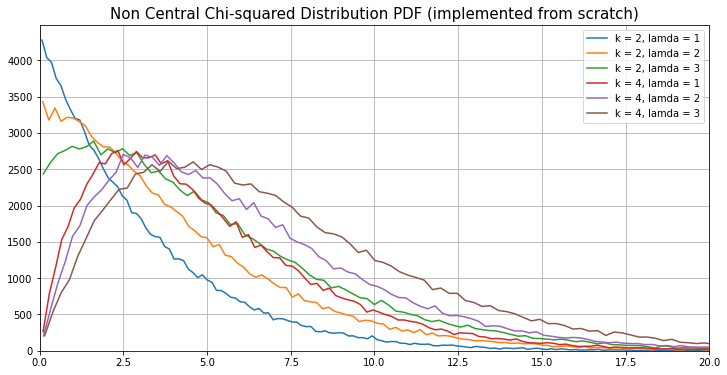

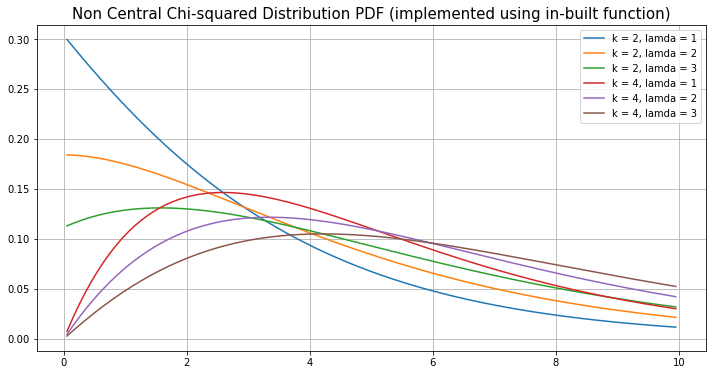

In [33]:
############ Implementing Non Central Chi-squared Distribution from scratch ############

plt.figure(figsize=(12,6))
N = 100000    # No of samples

# k=2, lambda=1
x1 = np.random.normal(1/np.sqrt(2), 1, N)
x2 = np.random.normal(1/np.sqrt(2), 1, N)

X1 = x1**2 + x2**2

n1, t1, _ = plt.hist(X1, bins='auto', color='white')
bin_centers1 = 0.5*(t1[1:]+t1[:-1])

# k=2, lambda=2
x1 = np.random.normal(1, 1, N)
x2 = np.random.normal(1, 1, N)

X2 = x1**2 + x2**2

n2, t2, _ = plt.hist(X2, bins='auto', color='white')
bin_centers2 = 0.5*(t2[1:]+t2[:-1])

# k=2, lambda=3
x1 = np.random.normal(np.sqrt(3/2), 1, N)
x2 = np.random.normal(np.sqrt(3/2), 1, N)

X3 = x1**2 + x2**2

n3, t3, _ = plt.hist(X3, bins='auto', color='white')
bin_centers3 = 0.5*(t3[1:]+t3[:-1])

# k=4, lambda=1
x1 = np.random.normal(1/2, 1, N)
x2 = np.random.normal(1/2, 1, N)
x3 = np.random.normal(1/2, 1, N)
x4 = np.random.normal(1/2, 1, N)

X4 = x1**2 + x2**2 + x3**2 + x4**2

n4, t4, _ = plt.hist(X4, bins='auto', color='white')
bin_centers4 = 0.5*(t4[1:]+t4[:-1])

# k=4, lambda=2
x1 = np.random.normal(1/np.sqrt(2), 1, N)
x2 = np.random.normal(1/np.sqrt(2), 1, N)
x3 = np.random.normal(1/np.sqrt(2), 1, N)
x4 = np.random.normal(1/np.sqrt(2), 1, N)

X5 = x1**2 + x2**2 + x3**2 + x4**2

n5, t5, _ = plt.hist(X5, bins='auto', color='white')
bin_centers5 = 0.5*(t5[1:]+t5[:-1])

# k=4, lambda=3
x1 = np.random.normal(np.sqrt(3)/2, 1, N)
x2 = np.random.normal(np.sqrt(3)/2, 1, N)
x3 = np.random.normal(np.sqrt(3)/2, 1, N)
x4 = np.random.normal(np.sqrt(3)/2, 1, N)

X6 = x1**2 + x2**2 + x3**2 + x4**2

n6, t6, _ = plt.hist(X6, bins='auto', color='white')
bin_centers6 = 0.5*(t6[1:]+t6[:-1])

# Plotting the non-central chi-squared distribution
plt.plot(bin_centers1,n1,label='k = 2, lamda = 1')
plt.plot(bin_centers2,n2,label='k = 2, lamda = 2')
plt.plot(bin_centers3,n3,label='k = 2, lamda = 3')
plt.plot(bin_centers4,n4,label='k = 4, lamda = 1')
plt.plot(bin_centers5,n5,label='k = 4, lamda = 2')
plt.plot(bin_centers6,n6,label='k = 4, lamda = 3')

plt.title('Non Central Chi-squared Distribution PDF (implemented from scratch)',size='15')
plt.xlim(0,20)
plt.legend()
plt.grid()
plt.show()


############ Implementing Non Central Chi-squared Distribution using Inbuilt function ############

from scipy import special

# Defining function for computing modified Bessel function of first kind
def bessel(k,L):
    x = np.arange(0.05,10,0.05) 
    v = k/2-1
    y = np.sqrt(L*x)

    return special.iv(v,y)
    
# Defining function for computing PDF of non-central chi-squared distribution
def noncentral_chisquare(k,L):
    x = np.arange(0.05,10,0.05)
    n = len(x)
    f = np.zeros(n)
    
    for i in range(n):
        f[i] = (1/2) * math.exp(-0.5*(x[i]+L)) * (x[i]/L)**(k/4-0.5) * bessel(k,L)[i]

    return f

x = np.arange(0.05,10,0.05)

fx11 = noncentral_chisquare(2,1)
fx12 = noncentral_chisquare(2,2)
fx13 = noncentral_chisquare(2,3)

fx21 = noncentral_chisquare(4,1)
fx22 = noncentral_chisquare(4,2)
fx23 = noncentral_chisquare(4,3)

plt.figure(figsize=(12,6))

plt.plot(x,fx11,label='k = 2, lamda = 1')
plt.plot(x,fx12,label='k = 2, lamda = 2')
plt.plot(x,fx13,label='k = 2, lamda = 3')

plt.plot(x,fx21,label='k = 4, lamda = 1')
plt.plot(x,fx22,label='k = 4, lamda = 2')
plt.plot(x,fx23,label='k = 4, lamda = 3')

plt.title('Non Central Chi-squared Distribution PDF (implemented using in-built function)',size='15')
plt.grid()
plt.legend()
plt.show()